<a href="https://colab.research.google.com/github/payalaggarwal177/Deepleaning-6thjuly/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## Binary Classification problem


In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd
df = pd .read_csv ('https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [4]:
df.shape

(42100, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [7]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Step 3 : Seprate x and Y

In [9]:
x = df.drop(columns=['id', 'booking_status'])
y = df[['booking_status']]

In [10]:
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [11]:
y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


## step 4 : Perform preprocessing

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe = Pipeline(steps = [('impute', SimpleImputer(strategy = 'median')),
                            ('Scaler',StandardScaler())]).set_output(transform = 'pandas')

In [18]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


## Step: Train test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size = 0.2, random_state = 42)

In [22]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [23]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [24]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [25]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


## Bluiding a neural network
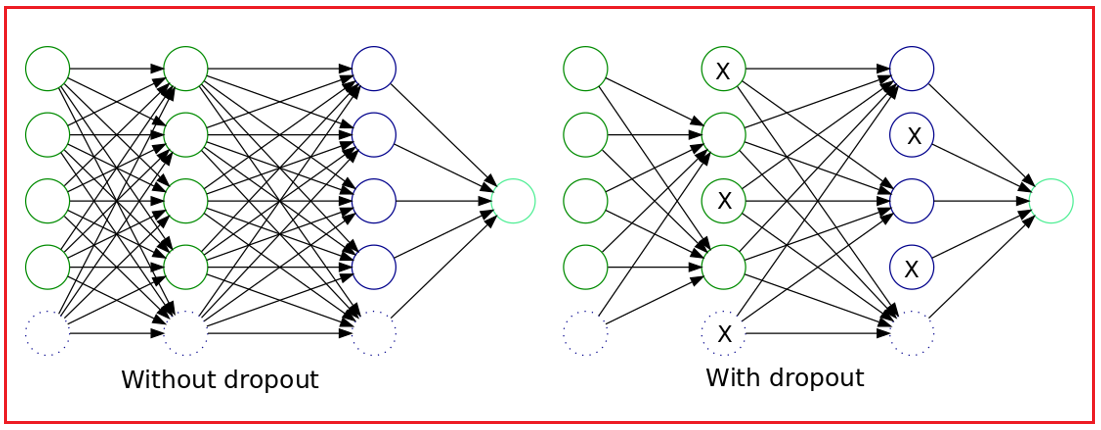

In [26]:
xtrain.shape[1]

17

## Dropout layer - Randomly drop some % of neural links

In [30]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [34]:
# Initialize the model
model = Sequential()

# Input Layer
model.add(Input(shape= (xtrain.shape[1], )))

# hidden Layer 1
model.add(Dense(64, activation = 'relu'))
# Add Dropout layer 1
model.add(Dropout(0.4))

# Hidden layer 2
model.add(Dense(32, activation = 'relu'))
# Add Dropout layer
model.add(Dropout(0.3))

# Add output Layer
model.add(Dense(1, activation = 'sigmoid'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy',
              metrics = ['accuracy'],
              optimizer ='adam')

In [43]:
hist = model.fit (xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
842/842 [==============================] - 8s 4ms/step - loss: 0.5269 - accuracy: 0.7368 - val_loss: 0.4819 - val_accuracy: 0.7736
Epoch 2/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4860 - accuracy: 0.7680 - val_loss: 0.4747 - val_accuracy: 0.7746
Epoch 3/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4757 - accuracy: 0.7779 - val_loss: 0.4695 - val_accuracy: 0.7739
Epoch 4/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4731 - accuracy: 0.7794 - val_loss: 0.4683 - val_accuracy: 0.7804
Epoch 5/60
842/842 [==============================] - 4s 5ms/step - loss: 0.4689 - accuracy: 0.7811 - val_loss: 0.4651 - val_accuracy: 0.7837
Epoch 6/60
842/842 [==============================] - 4s 5ms/step - loss: 0.4682 - accuracy: 0.7831 - val_loss: 0.4632 - val_accuracy: 0.7846
Epoch 7/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4642 - accuracy: 0.7866 - val_loss: 0.4653 - val_accuracy: 0.7892
Epoch 

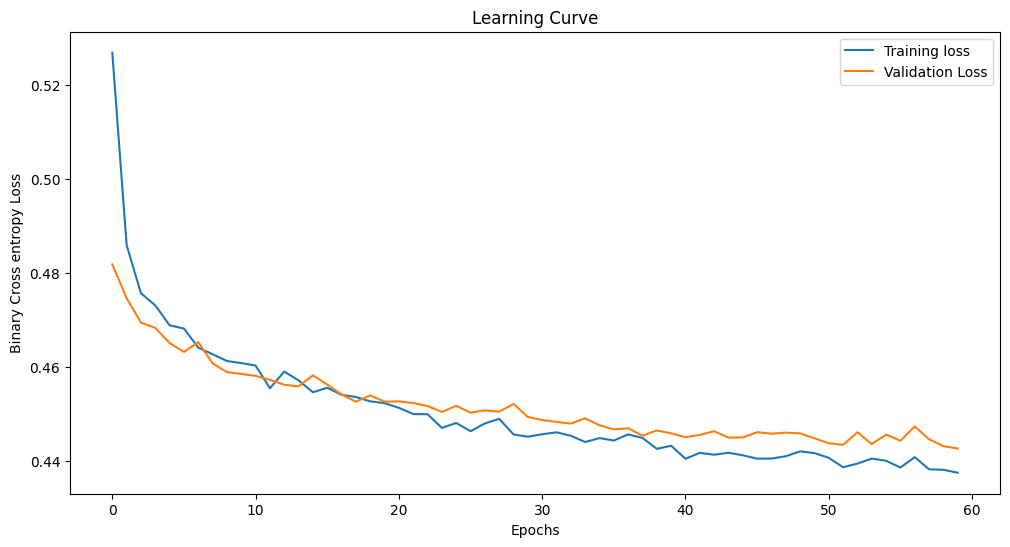

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(hist.history['loss'], label = 'Training loss')
plt.plot(hist.history['val_loss'], label ='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross entropy Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [45]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 3s 3ms/step - loss: 0.4223 - accuracy: 0.8100


[0.42234697937965393, 0.8099762201309204]

In [46]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 2s 6ms/step - loss: 0.4294 - accuracy: 0.8038


[0.4293965995311737, 0.8038004636764526]

## get predicions on train and test

In [47]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

264/264 [==============================] - 0s 2ms/step


In [49]:
yprob_train[0:5]

array([[0.00546639],
       [0.14551151],
       [0.8189826 ],
       [0.73436964],
       [0.816749  ]], dtype=float32)

In [50]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [53]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>= 0.5 else 0 for prob in yprob_test]

In [54]:
ypred_train[0:5]

[0, 0, 1, 1, 1]

In [55]:
ypred_test[0:5]

[0, 1, 0, 0, 0]

In [56]:
yprob_test[0:5]

array([[0.03754203],
       [0.9142016 ],
       [0.42880538],
       [0.01080939],
       [0.13147056]], dtype=float32)

## Confusion Matrix

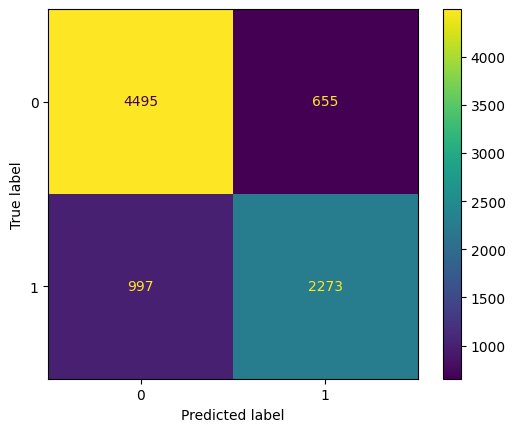

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      5150
           1       0.78      0.70      0.73      3270

    accuracy                           0.80      8420
   macro avg       0.80      0.78      0.79      8420
weighted avg       0.80      0.80      0.80      8420



In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yprob_test)

0.8768073394495414

## ROC_AUC score is more than 80% hence model is good

Out of sample predictions

In [62]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_test.csv"
xnew = pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [63]:
xnew2 = xnew.drop(columns = ['id'])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [64]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [65]:
probs = model.predict(xnew2_pre)

878/878 [==============================] - 2s 2ms/step


In [67]:
probs[0:5]

array([[0.05682719],
       [0.02647065],
       [0.30142638],
       [0.17521086],
       [0.5383371 ]], dtype=float32)

In [68]:
preds = [1 if prob>=0.5 else 0 for prob in probs]
preds[0:5]

[0, 0, 0, 0, 1]

In [70]:
df_final = xnew[['id']]
df_final['booking_status'] = preds
df_final['probablity'] = probs

In [71]:
df_final

,id,booking_status,probablity
0,42100,0,0.056827
1,42101,0,0.026471
2,42102,0,0.301426
3,42103,0,0.175211
4,42104,1,0.538337
...,...,...,...
28063,70163,1,0.966362
28064,70164,0,0.045468
28065,70165,0,0.145371
28066,70166,0,0.384504


In [72]:
df_final['booking_status'].value_counts()


booking_status
0    18410
1     9658
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

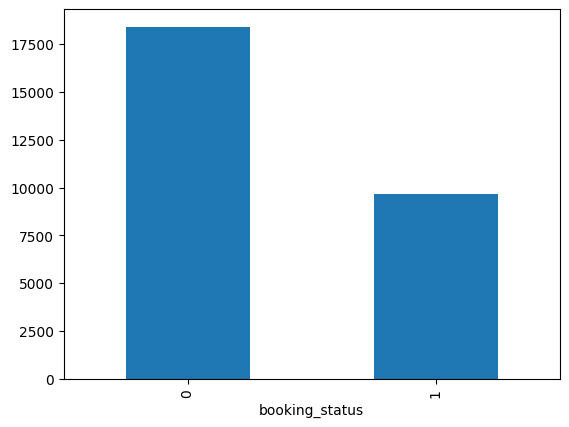

In [73]:
df_final['booking_status'].value_counts().plot(kind = 'bar')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [74]:
df_final.to_csv('Results.csv', index = False)